In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/tidaldatathon_sp24/model/data.csv')

In [5]:
df

,clear,sand_soil_dirt,fog_smog_smoke,rain,crosswind,sleet_hail,snow,fatal
0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4918,0,0,0,0,0,0,1,0
4919,0,0,0,0,0,0,1,0
4920,0,0,0,0,0,0,1,0
4921,0,0,0,0,0,0,1,0


In [6]:
y = df['fatal']
X = df.drop('fatal', axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_drt = lgb.LGBMClassifier(boosting_type='DART')
model_drt.fit(X_train, y_train)

In [9]:
y_pred_drt = model_drt.predict(X_test)


In [10]:
accuracy_drt = accuracy_score(y_test, y_pred_drt)

conf_matrix_drt = confusion_matrix(y_test, y_pred_drt)
norm_conf_matrix_drt = confusion_matrix(y_test,y_pred_drt,normalize='true')

accuracy_drt

0.9827411167512691

In [11]:
explainer_new_drt = shap.Explainer(model_drt, X)
new_shap_values_drt = explainer_new_drt(X)

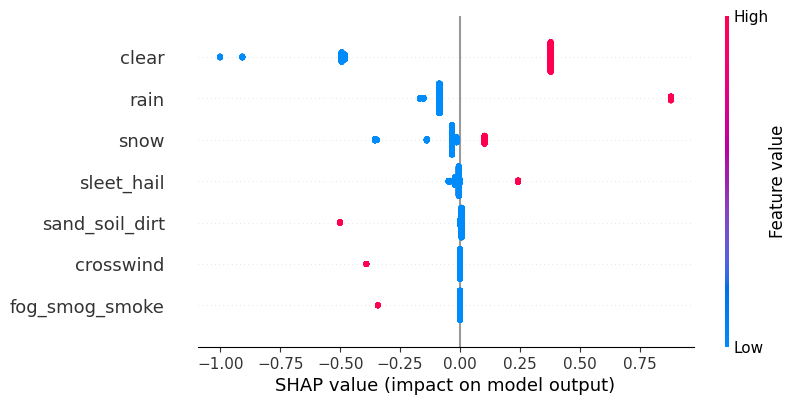

In [12]:
shap.plots.beeswarm(new_shap_values_drt)

In [13]:
dump(model_drt, 'model_drt.joblib')

['model_drt.joblib']